# **TMBD: Clash of the Revenues: Indie vs Blockbuster**
#### **Index**
>#### 1. [Importing and data cleaning](#1.-Importing-and-data-cleaning)
>#### 2. [Revenue: basic overview](#2.-Revenue:-basic-overview)
>#### 3. [Revenue and budgets](#3.-Revenue-and-budgets)

## 1. Importing and data cleaning

In [47]:
# Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [48]:
# Dataset in current directory, else respecify pathway
data = 'TMDB_movies.csv'

df = pd.read_csv(data)

In [77]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,year,month,genre_list,keywords_list,companiess_list,languages_list
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Enter the World of Pandora.,Avatar,7.2,11800,2009,12,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Ingenious Film Partners, Twentieth Century Fo...","[English, Español]"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007,5,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Walt Disney Pictures, Jerry Bruckheimer Films...",[English]


In [50]:
# Null exploration
def null_vals(dataframe):
    '''function to show both number of nulls and the percentage of nulls in the whole column'''
    null_vals = dataframe.isnull().sum() ## How many nulls in each column
    total_cnt = len(dataframe) ## Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null']) ## Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) ## Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False)

null_vals(df)

,null,percent
homepage,3091,64.356
tagline,844,17.572
overview,3,0.062
runtime,2,0.042
release_date,1,0.021
budget,0,0.000
vote_average,0,0.000
title,0,0.000
status,0,0.000
spoken_languages,0,0.000


In [51]:
# Drop insignificant nulls
df.dropna(
    axis = 0,
    how = 'any',
    subset = ['overview', 'runtime', 'release_date'],
    inplace = True
)

**Adds N/A to missing taglines and homepages:**

In [52]:
df['tagline'].fillna(
    value = 'N/A',
    method = None,
    inplace = True
)

C:\Users\Owner\AppData\Local\Temp\ipykernel_5068\2526801947.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tagline'].fillna(


In [53]:
df['homepage'].fillna(
    value = 'N/A',
    method = None,
    inplace = True
)

C:\Users\Owner\AppData\Local\Temp\ipykernel_5068\1996592443.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['homepage'].fillna(


In [54]:
null_vals(df)

,null,percent
budget,0,0.0
genres,0,0.0
vote_average,0,0.0
title,0,0.0
tagline,0,0.0
status,0,0.0
spoken_languages,0,0.0
runtime,0,0.0
revenue,0,0.0
release_date,0,0.0


**Adds year and month columns:**

In [55]:
df['year'] = df['release_date'].str[:4].astype(int)

In [56]:
df['month'] = df['release_date'].str[5:7].astype(int)

**Extracts dictionary items into new columns:**

In [76]:
# Function for extracting items from a dictionary string
df['genre_list'] = df['genres'].apply(lambda x: [item['name'] for item in ast.literal_eval(x)])

In [59]:
# Function for extracting items from a dictionary string
df['keywords_list'] = df['keywords'].apply(lambda x: [item['name'] for item in ast.literal_eval(x)])

In [60]:
# Function for extracting items from a dictionary string
df['companiess_list'] = df['production_companies'].apply(lambda x: [item['name'] for item in ast.literal_eval(x)])

In [61]:
# Function for extracting items from a dictionary string
df['languages_list'] = df['spoken_languages'].apply(lambda x: [item['name'] for item in ast.literal_eval(x)])

**New dataframes for missing revenue and budget figures:**

In [63]:
df2 = df[df.revenue >= 10000] # Drops missing/incorrect revenues
df3 = df2[df2.budget >= 10000] # Drops missing/incorrect budget

In [ ]:
# Check for other irregularities on numericals
df3[['id','popularity','runtime','vote_count','vote_average']].describe()

## 2. Revenue: basic overview

A histogram of the revenue below shows a heavy left skew, due to the 'hit-or-miss' nature of the industry.

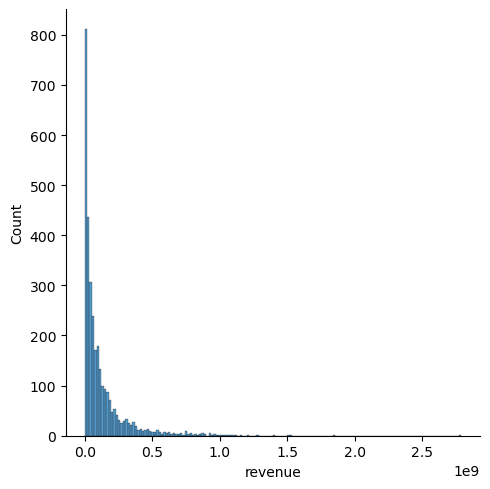

In [64]:
sns.displot(df3.revenue)
plt.show()

It's quite rare for a film to gross more than \\$1 billion. Of the 3205 films left after data cleaning, only 21 do so. These stand out as extreme outliers. And the top 10 by revenue are represented in the following graph. Coming in at number one is _Avatar_, having grossed more than \\$2.7 billion.

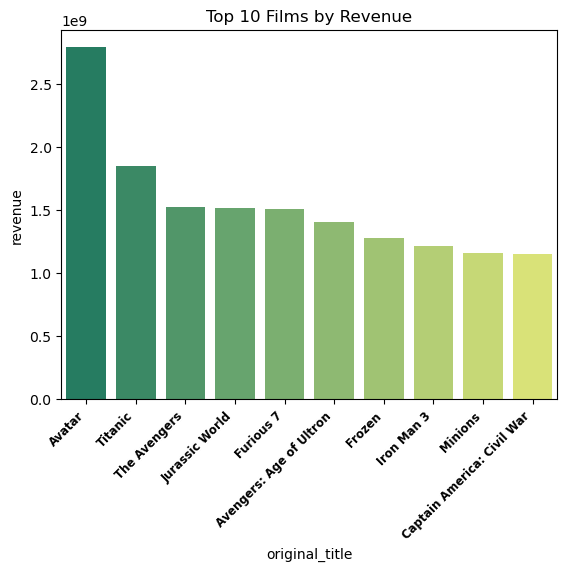

In [65]:
top_grossing_films = df.sort_values('revenue', ascending = False).head(10)
sns.barplot(x = 'original_title',
            y = 'revenue',
            data = top_grossing_films,
            hue = 'original_title',
            legend=False,
            palette = 'summer',
           )

plt.xticks(rotation=45, # rotating labels
           horizontalalignment = 'right', # aligning them with the bars
           fontweight = 'bold',
           fontsize = 'small' # setting the fonts
          )
plt.title('Top 10 Films by Revenue')
plt.show()

The following heatmap shows correlations between the numberic variables in the data. Vote count and budget have especially high correlations with revenue, which would be expected. Interestingly, vote average does not, which might suggest that a frequently-watched film gets a lot of votes, while that viewership count doesn't directly translate into high ratings.

Also, runtime is uncorrelated, so providing "more movie" doesn't automatically increase box office appeal. Nor are there strong effects from seasonality or increasing year count.

This means that budgets are the best place to look for explaining movie revenues!

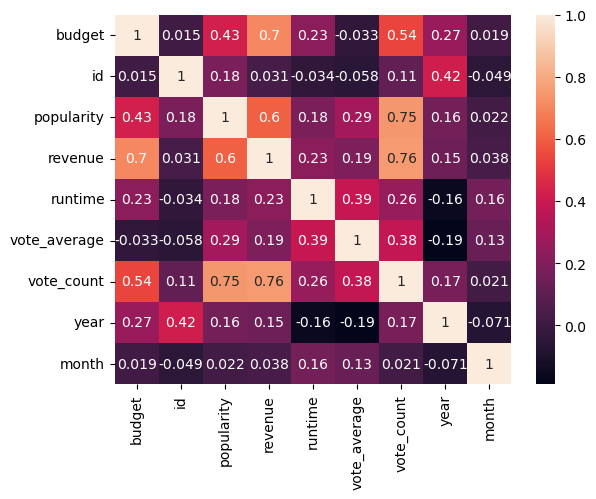

In [66]:
sns.heatmap(df3.corr(numeric_only=True),
           annot=True)
plt.show()

## 3. Revenue and budgets

In [67]:
# Adds column for revenue as multiple of film budgets
df3['revenue_multiple'] = round((df.revenue / df.budget),1)

C:\Users\Owner\AppData\Local\Temp\ipykernel_5068\4173142459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['revenue_multiple'] = round((df.revenue / df.budget),1)


First a look at the films with the highest budgets in the dataframe:

In [68]:
df3.sort_values('budget',ascending=False).head(10)[['original_title','revenue','budget','revenue_multiple']]

,original_title,revenue,budget,revenue_multiple
17,Pirates of the Caribbean: On Stranger Tides,1045713802,380000000,2.8
1,Pirates of the Caribbean: At World's End,961000000,300000000,3.2
7,Avengers: Age of Ultron,1405403694,280000000,5.0
10,Superman Returns,391081192,270000000,1.4
4,John Carter,284139100,260000000,1.1
6,Tangled,591794936,260000000,2.3
5,Spider-Man 3,890871626,258000000,3.5
13,The Lone Ranger,89289910,255000000,0.4
98,The Hobbit: An Unexpected Journey,1021103568,250000000,4.1
26,Captain America: Civil War,1153304495,250000000,4.6


From the table above we see the high correlation between budget and revenue. Of the films with the highest budgets, four gross over \\$ 1 billion, an otherwise rare occurence. Two of these, _Avengers: Age of Ultron_ and _Captain America: Civil War_ also appear in the top 10 grossing films. From this table we see that having a high budget will usually translate into having a high revenue, although this is not always the case. _The Lone Ranger_ is a notable exception, having been a major flop and earning less than half of its budget. But in general, **big budgets lead to higher revenue**.

On the opposite end of the spectrum, the next table shows films by budget in ascending order:

In [69]:
df3.sort_values('budget').head(10)[['original_title','revenue','budget','revenue_multiple']]

,original_title,revenue,budget,revenue_multiple
4724,Eraserhead,7000000,10000,700.0
4788,Pink Flamingos,6000000,12000,500.0
4577,Paranormal Activity,193355800,15000,12890.4
4792,キュア,99000,20000,5.0
4773,Clerks,3151130,27000,116.7
4772,Down Terrace,10000,31192,0.3
4738,Pi,3221152,60000,53.7
4496,The Blair Witch Project,248000000,60000,4133.3
4752,Tiny Furniture,416498,65000,6.4
4742,Super Size Me,28575078,65000,439.6


Noteable about these is the large number of indie cult classics: _Eraserhead_, _Pink Flamingos_, _Paranormal Activity_, _Clerks_ and _The Blair Witch Project_. These have returns that are many multiples of their budgets. _Paranormal Activity_, for instance, returns 1.3 million % (!), having earned \\$193 million on an orginal budget of \\$15000. This far outpaces the revenue multiples from the previous table, where the highest multiple is for _Avengers: Age of Ultron_ at 500%.

The table below orders movies by revenue multiple. It's populated with many of the same films as the previous table (including the documentary _Super Size Me_). This shows the potential for **smaller titles** to have a much **larger proportional return**. Interestingly, adding genres shows a tendency for horror, including the aforementioned _Paranormal Activity_, _The Blair Witch Project_ and _Eraserhead_. That could be because horror lends itself well to indie budget sizes or they might be a way of making a large impact with minimal resources.

In [72]:
df3.sort_values('revenue_multiple',ascending=False).head(10)[['original_title','revenue','budget','revenue_multiple','genre_list']]

,original_title,revenue,budget,revenue_multiple,genre_list
4577,Paranormal Activity,193355800,15000,12890.4,"[Horror, Mystery]"
4496,The Blair Witch Project,248000000,60000,4133.3,"[Horror, Mystery]"
4724,Eraserhead,7000000,10000,700.0,"[Drama, Fantasy, Horror, Science Fiction]"
4788,Pink Flamingos,6000000,12000,500.0,"[Horror, Comedy, Crime]"
4742,Super Size Me,28575078,65000,439.6,"[Documentary, Comedy, Drama]"
4723,The Gallows,42664410,100000,426.6,"[Horror, Thriller]"
4514,Open Water,54667954,130000,420.5,"[Drama, Thriller]"
3159,The Texas Chain Saw Massacre,30859000,85000,363.0,[Horror]
4441,Bambi,267447150,858000,311.7,"[Animation, Drama, Family]"
4668,The Stewardesses,27000000,100000,270.0,[Comedy]


So in sum, while big budgets garner a lot of box office attention, smaller films have the potential for a much return on capital. Meanwhile, if they flop, the loss is much less severe than they are for major Hollywood projects. However, it's also important to look out for selection bias, as films with such micro-budgets might have a lower chance of being listed on TMDB if they flop. And cancelled projects never make it to the listing, so even producing indie films carries hidden risk.